In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
#region region_sample
import warnings
warnings.filterwarnings("ignore")
#endregion
# SeasonWise Partition
df = pd.read_csv(r"C:\Users\adity\Documents\Final Year Project\filteredData_train.csv")
df1 =df[(df["ModuleMonth"] >= 2) & (df["ModuleMonth"] < 6)]
df2 =df[(df["ModuleMonth"] >= 6) & (df["ModuleMonth"] < 10)]
df3 =df[(df["ModuleMonth"] >= 10) & (df["ModuleMonth"]) < 13 & (df["ModuleMonth"] == 1)]
df1

,time,ModuleYear,ModuleMonth,module,Isc,Voc,Ipmax,Vpmax,Pmax,Temp_Mid_avg,Gt,WS,Tamb
1355,2/1/2010 8:00,2010,2,S20_REV205,0.512,73.22,0.471,64.70,30.0,7.046,111.6259,0.000,7.893
1356,2/1/2010 8:10,2010,2,S20_REV205,0.672,72.98,0.622,65.23,41.0,9.180,145.8470,0.000,8.980
1357,2/1/2010 8:20,2010,2,S20_REV205,0.844,73.83,0.783,65.09,51.0,10.810,184.2625,0.000,9.700
1358,2/1/2010 8:30,2010,2,S20_REV205,1.032,73.14,0.957,64.30,62.0,13.720,226.9541,0.000,10.900
1359,2/1/2010 8:40,2010,2,S20_REV205,1.100,73.75,1.051,64.88,68.0,16.040,267.9983,0.402,11.970
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8386,5/31/2010 17:10,2010,5,S20_REV205,0.644,66.68,0.587,59.50,35.0,44.600,241.2573,2.889,41.220
8387,5/31/2010 17:20,2010,5,S20_REV205,0.563,66.45,0.517,58.95,30.0,43.670,209.4345,1.339,41.070
8388,5/31/2010 17:30,2010,5,S20_REV205,0.489,66.45,0.449,57.96,26.0,42.690,178.1058,2.076,40.920
8389,5/31/2010 17:40,2010,5,S20_REV205,0.408,66.37,0.369,58.62,22.0,41.870,144.8854,2.094,40.690


In [3]:
# For season 1 
x_mod_season1 = df1[['Gt', 'WS', 'Tamb']]
y_mod_season1 = df1[['Temp_Mid_avg']]

In [4]:
X_train_season1, X_test_season1, y_train_season1, y_test_season1 = train_test_split(
    x_mod_season1, y_mod_season1, test_size=0.2)
regressor = RandomForestRegressor(n_estimators=100, random_state=1)
regressor.fit(X_train_season1, y_train_season1.values.ravel())

y_pred_season1 = regressor.predict(X_test_season1)
daf_season1=pd.DataFrame({'Actual':y_test_season1.values.flatten(), 'Predicted':y_pred_season1,'Error':abs(y_pred_season1-y_test_season1.values.flatten())})
daf_season1
print("-----------------------------------------")
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_season1, y_pred_season1)))

-----------------------------------------
Root Mean Squared Error: 3.3975411927181214


In [5]:
# For Season2
x_mod_season2 = df2[['Gt', 'WS', 'Tamb']]
y_mod_season2 = df2[['Temp_Mid_avg']]

In [6]:
X_train_season2, X_test_season2, y_train_season2, y_test_season2 = train_test_split(
    x_mod_season2, y_mod_season2, test_size=0.2)
regressor2 = RandomForestRegressor(n_estimators=100, random_state=1)
regressor2.fit(X_train_season2, y_train_season2.values.ravel())

y_pred_season2 = regressor2.predict(X_test_season2)
daf_season2=pd.DataFrame({'Actual':y_test_season2.values.flatten(), 'Predicted':y_pred_season2,'Error':abs(y_pred_season2-y_test_season2.values.flatten())})
daf_season2
print("-----------------------------------------")
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_season2, y_pred_season2)))

-----------------------------------------
Root Mean Squared Error: 4.730329257480854


In [7]:
# For Season 3
x_mod_season3 = df3[['Gt', 'WS', 'Tamb']]
y_mod_season3 = df3[['Temp_Mid_avg']]

In [8]:
X_train_season3, X_test_season3, y_train_season3, y_test_season3 = train_test_split(
    x_mod_season3, y_mod_season3, test_size=0.2)
regressor3 = RandomForestRegressor(n_estimators=100, random_state=1)
regressor3.fit(X_train_season3, y_train_season3.values.ravel())

y_pred_season3 = regressor3.predict(X_test_season3)
daf_season3=pd.DataFrame({'Actual':y_test_season3.values.flatten(), 'Predicted':y_pred_season3,'Error':abs(y_pred_season3-y_test_season3.values.flatten())})
daf_season3
print("-----------------------------------------")
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_season3, y_pred_season3)))

-----------------------------------------
Root Mean Squared Error: 3.2749470410244443


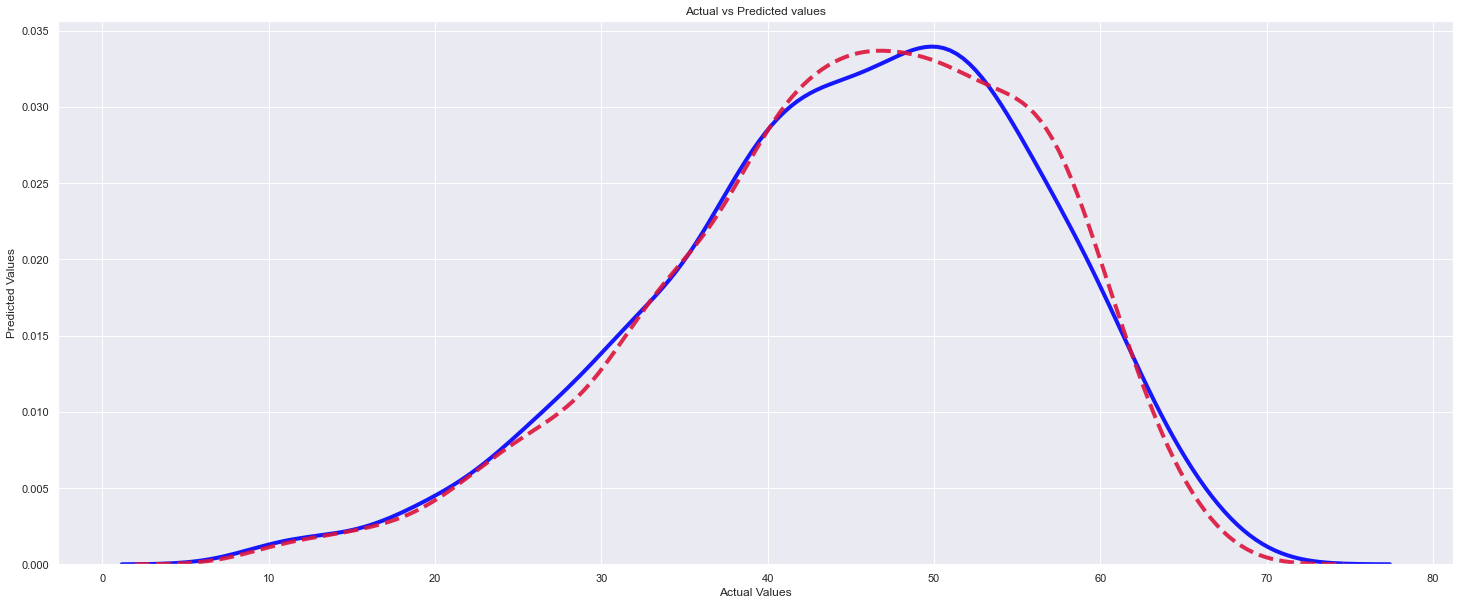

In [9]:
sns.set(rc={'figure.figsize':(25,10)})


ax = sns.distplot(y_test_season1, hist=False,kde_kws = {'color':'#0000ff', 
                       'linewidth':4, 'linestyle':'-', 'alpha':0.9} , label="Actual Value")
sns.distplot(y_pred_season1, hist=False, kde_kws = {'color':'#DC143C', 
                       'linewidth':4, 'linestyle':'--', 'alpha':0.9}, label="Predicted Values" , ax=ax)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


plt.title('Actual vs Predicted values')


plt.show()

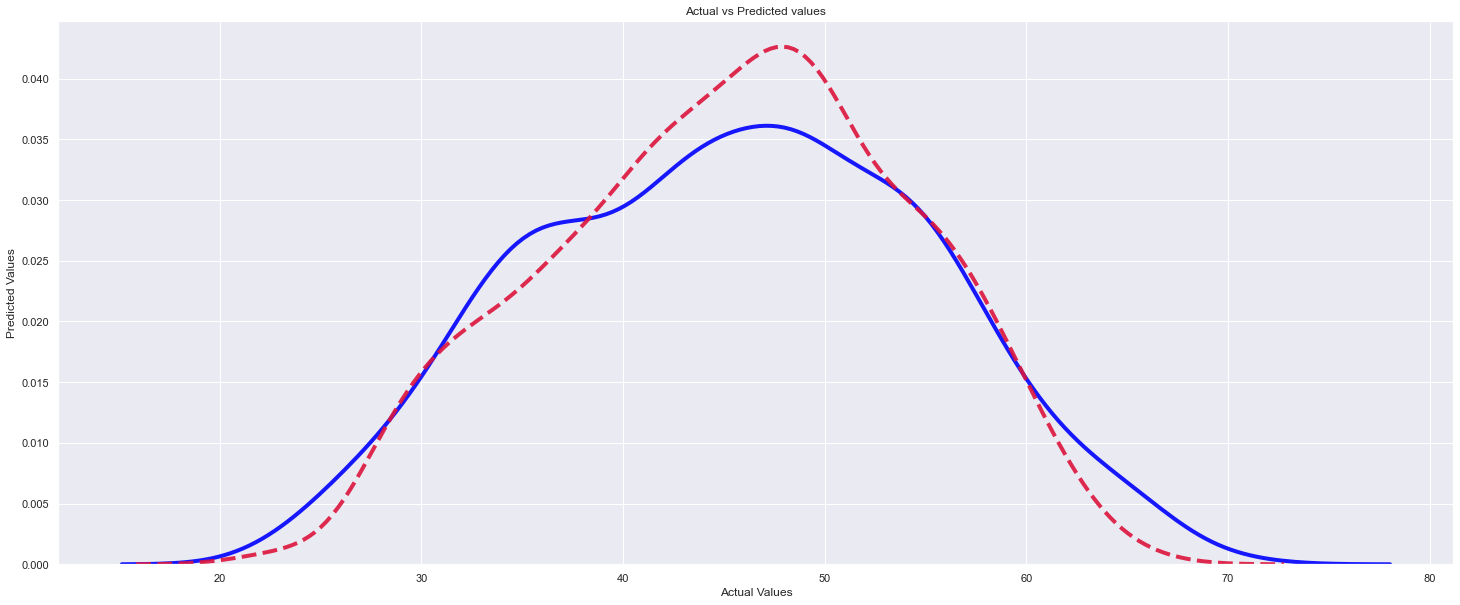

In [10]:
sns.set(rc={'figure.figsize':(25,10)})


ax = sns.distplot(y_test_season2, hist=False,kde_kws = {'color':'#0000ff', 
                       'linewidth':4, 'linestyle':'-', 'alpha':0.9} , label="Actual Value")
sns.distplot(y_pred_season2, hist=False, kde_kws = {'color':'#DC143C', 
                       'linewidth':4, 'linestyle':'--', 'alpha':0.9}, label="Predicted Values" , ax=ax)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


plt.title('Actual vs Predicted values')


plt.show()

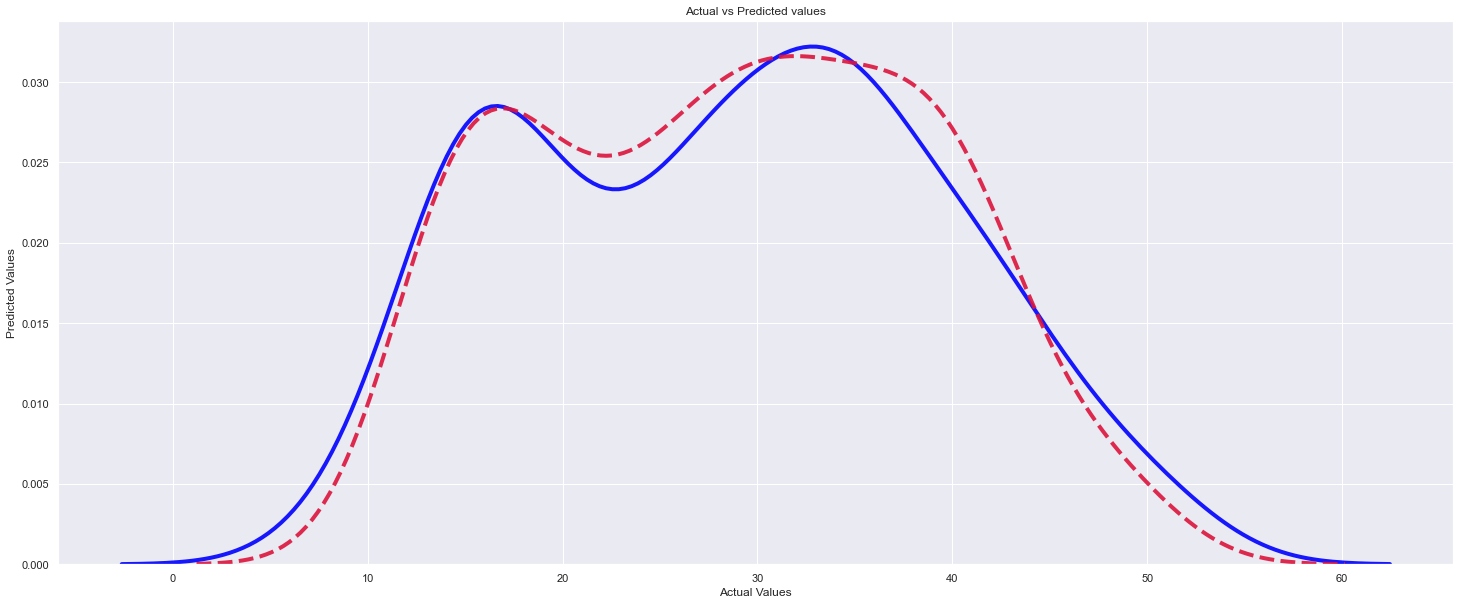

In [11]:
sns.set(rc={'figure.figsize':(25,10)})


ax = sns.distplot(y_test_season3, hist=False,kde_kws = {'color':'#0000ff', 
                       'linewidth':4, 'linestyle':'-', 'alpha':0.9} , label="Actual Value")
sns.distplot(y_pred_season3, hist=False, kde_kws = {'color':'#DC143C', 
                       'linewidth':4, 'linestyle':'--', 'alpha':0.9}, label="Predicted Values" , ax=ax)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


plt.title('Actual vs Predicted values')


plt.show()

In [12]:
x_pmax_season1 = df1[['Isc', 'Voc']]
y_pmax_season1 = df1[['Pmax']]

In [13]:
X_train_pmax_season1, X_test_pmax_season1, y_train_pmax_season1, y_test_pmax_season1 = train_test_split(
    x_pmax_season1, y_pmax_season1, test_size=0.2)
regressor_pmax_season1 = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_pmax_season1.fit(X_train_pmax_season1, y_train_pmax_season1.values.ravel())

y_pred_pmax_season1 = regressor_pmax_season1.predict(X_test_pmax_season1)
daf_pmax_season1=pd.DataFrame({'Actual':y_test_pmax_season1.values.flatten(), 'Predicted':y_pred_pmax_season1,'Error':abs(y_pred_pmax_season1-y_test_pmax_season1.values.flatten())})

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_pmax_season1, y_pred_pmax_season1)))

Root Mean Squared Error: 2.35658647223618


In [14]:
x_pmax_season2 = df2[['Isc', 'Voc']]
y_pmax_season2 = df2[['Pmax']]

In [15]:
X_train_pmax_season2, X_test_pmax_season2, y_train_pmax_season2, y_test_pmax_season2 = train_test_split(
    x_pmax_season2, y_pmax_season2, test_size=0.2)
regressor_pmax_season2 = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_pmax_season2.fit(X_train_pmax_season2, y_train_pmax_season2.values.ravel())

y_pred_pmax_season2 = regressor_pmax_season2.predict(X_test_pmax_season2)
daf_pmax_season2=pd.DataFrame({'Actual':y_test_pmax_season2.values.flatten(), 'Predicted':y_pred_pmax_season2,'Error':abs(y_pred_pmax_season2-y_test_pmax_season2.values.flatten())})

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_pmax_season2, y_pred_pmax_season2)))

Root Mean Squared Error: 1.952711079843099


In [16]:
x_pmax_season3 = df3[['Isc', 'Voc']]
y_pmax_season3 = df3[['Pmax']]

In [17]:
X_train_pmax_season3, X_test_pmax_season3, y_train_pmax_season3, y_test_pmax_season3 = train_test_split(
    x_pmax_season3, y_pmax_season3, test_size=0.2)
regressor_pmax_season3 = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_pmax_season3.fit(X_train_pmax_season3, y_train_pmax_season3.values.ravel())

y_pred_pmax_season3 = regressor_pmax_season3.predict(X_test_pmax_season3)
daf_pmax_season3=pd.DataFrame({'Actual':y_test_pmax_season3.values.flatten(), 'Predicted':y_pred_pmax_season3,'Error':abs(y_pred_pmax_season3-y_test_pmax_season3.values.flatten())})

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_pmax_season3, y_pred_pmax_season3)))

Root Mean Squared Error: 1.7509214320153172


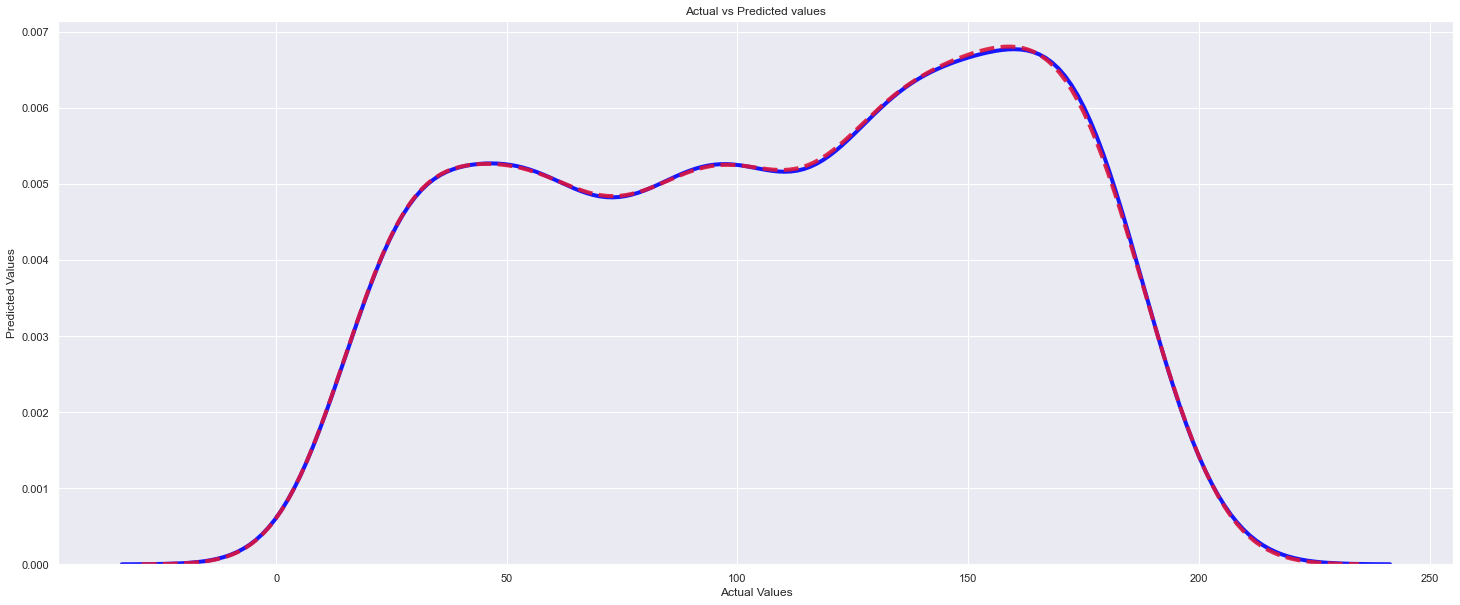

In [18]:
sns.set(rc={'figure.figsize':(25,10)})


ax = sns.distplot(y_test_pmax_season1, hist=False,kde_kws = {'color':'#0000ff', 
                       'linewidth':4, 'linestyle':'-', 'alpha':0.9} , label="Actual Value")
sns.distplot(y_pred_pmax_season1, hist=False, kde_kws = {'color':'#DC143C', 
                       'linewidth':4, 'linestyle':'--', 'alpha':0.9}, label="Predicted Values" , ax=ax)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


plt.title('Actual vs Predicted values')


plt.show()

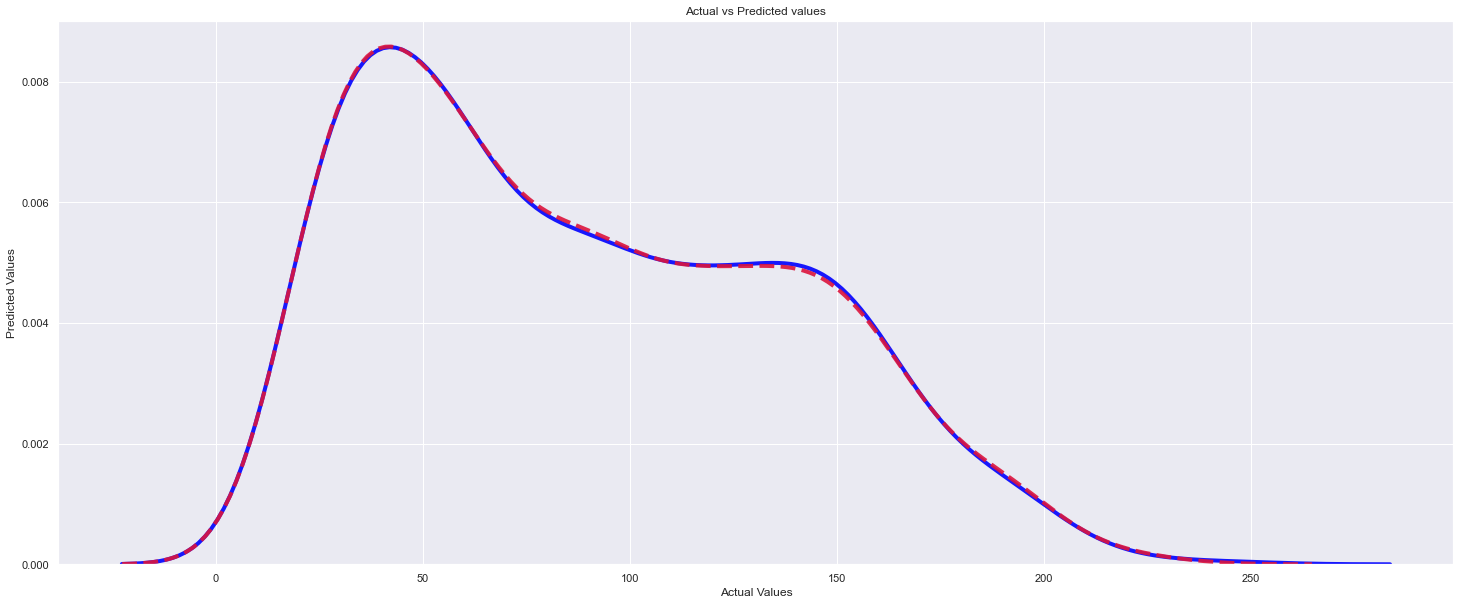

In [19]:
sns.set(rc={'figure.figsize':(25,10)})


ax = sns.distplot(y_test_pmax_season2, hist=False,kde_kws = {'color':'#0000ff', 
                       'linewidth':4, 'linestyle':'-', 'alpha':0.9} , label="Actual Value")
sns.distplot(y_pred_pmax_season2, hist=False, kde_kws = {'color':'#DC143C', 
                       'linewidth':4, 'linestyle':'--', 'alpha':0.9}, label="Predicted Values" , ax=ax)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


plt.title('Actual vs Predicted values')


plt.show()

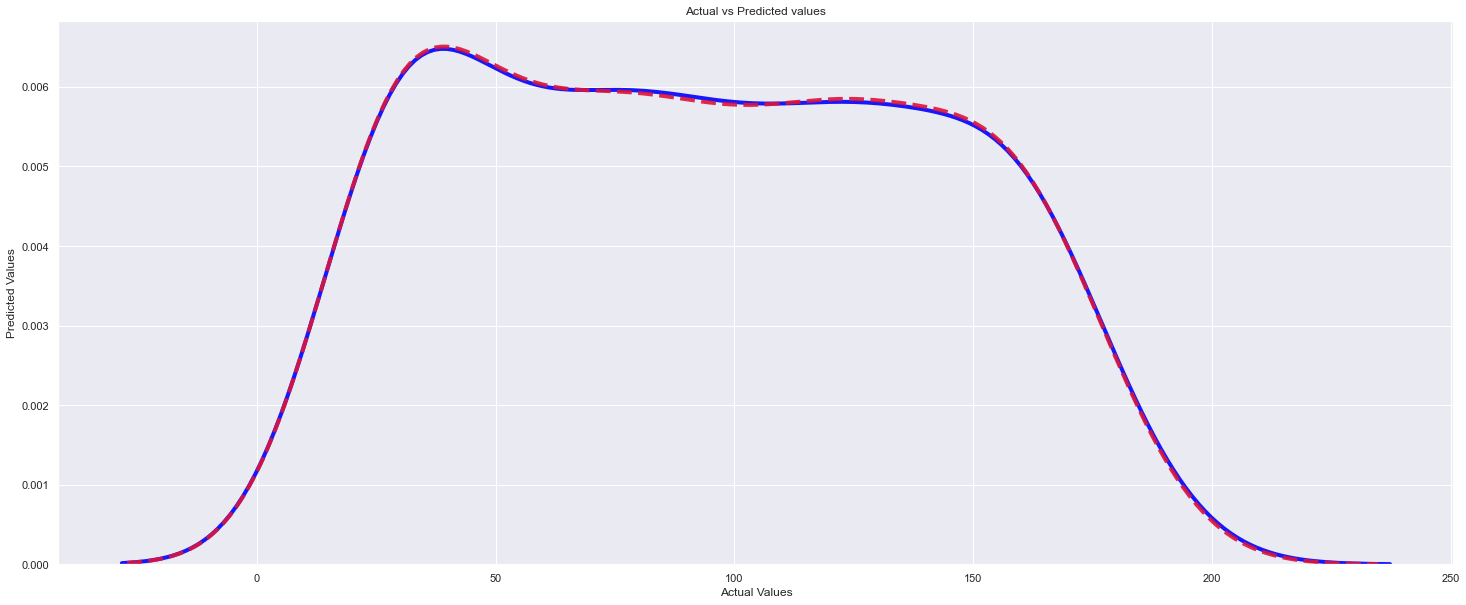

In [20]:
sns.set(rc={'figure.figsize':(25,10)})


ax = sns.distplot(y_test_pmax_season3, hist=False,kde_kws = {'color':'#0000ff', 
                       'linewidth':4, 'linestyle':'-', 'alpha':0.9} , label="Actual Value")
sns.distplot(y_pred_pmax_season3, hist=False, kde_kws = {'color':'#DC143C', 
                       'linewidth':4, 'linestyle':'--', 'alpha':0.9}, label="Predicted Values" , ax=ax)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


plt.title('Actual vs Predicted values')


plt.show()